In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [3]:
import spike_train_sim_functions
from spike_train_sim_functions import plot_tuning_curves, neuron1_highest_rate, neuron2_highest_rate, neuron3_highest_rate, neuron4_highest_rate

In [ ]:
angle_degree_clockwise = (90 - np.degrees(angle_radian)) % 360  # measured clockwise from the positive y-axis
angle_degree_clockwise

np.float64(111.6652362758843)

This notebook demonstrates the extraction of the value of a stimulus parameter, the angle of wind direction, from the spike-count firing rates of a population of neurons using one of the computationally light neural decoding techniques, the **Population Vector** method.

**Neural decoding** utilizes mathematical algorithms and/or probabilistic frameworks to reconstruct the reverse mapping of the stimulus from the neuron responses. It asks the question, given the response of a neuron or a population of neurons, what do these responses tell us about the stimulus?
  - Depending on the use case, different decoding techniques are used. These techniques utilize a range of models, from linear models for simpler tasks like cursor control and robotic arm movement, which require fast real-time responses, to resource-intensive neural networks and transformer-based models for complex tasks such as speech and handwriting decoding.
  - Since the population vector is simply a linear combination of normalized firing rates, this simplicity makes it a faster method, but at the cost of accuracy, neural variability, and interactions.

### Historical Background

The population vector method was introduced in a 1986 paper by Georgopoulos and colleagues. Their experiment involved recording the firing activity of individual neurons in the M1 motor cortex area of a pair of rhesus monkeys while the primate pulled a handle in 8 different directions. The authors discovered that a group of neurons more robustly encodes movement direction than single neuronal units.
  - The simplicity, interpretability, and a $\mathcal{O}(n)$ time-complexity made it the preferred choice for real-time decoding in low-power prosthetic devices right up until the advent of neural networks in the mid-2010s. The technique is still relevant today as it provides a baseline for the performance of decoding algorithms and for understanding neural population dynamics.

### Definition

The Population vector is one of the population coding schemes for representing complex stimuli from the combined activity of a population of neurons.
- The Population Vector model assumes the firing rate of each neuron encodes the movement direction. Each neuron is represented by a vector whose firing rate is proportional to its magnitude, and the preferred orientation is the direction of the vector described as a basis vector in 2D space.
- Each neuron contributes a vector where the vector points in the direction eliciting maximum firing. Summing these normalized vectors, each pointing in a different direction, yields a resultant vector.
- The direction of the resultant vector represents the direction of intended motion.

$$
\vec{v}_{pop} = \sum_{i=1}^{4} r_i \vec{b}_i
$$
  - $r_i$ is the normalized firing rate and $\vec{b}_i$ is the neuron's basis vector.

### Cricket Cercal System

The Cricket Cercal system is tasked with sensing low-velocity air currents, critical to the insect for survival and evading predators. Insects like crickets and cockroaches can sense minute movements in their vicinity because of the presence of two antenna-like structures on their abdomen called the ‘cerci’. 

These cerci are covered with mechanosensory fine hairs, which are sensitive to air movements.  The deflection of these hairs causes the firing of sensory neurons. These sensory neurons are connected to a set of interneurons, which are responsible for relaying this information to the cricket’s nervous system. Thus, the movement in the vicinity of the organism is transduced to electrical signals in the nervous system. Theunissen and Miller found that just four types of interneurons are involved in encoding direction at low wind velocities.


### Dataset Explanation

The dataset used in this notebook comes from the experiment mentioned in Theunissen et al.,1991, which investigated how the cricket's cercal sensory system encodes the wind stimuli.
  - The second cell of this notebook imports the maximum firing rate of the interneurons already calculated in the spike generation notebook. The dataset used in that previous notebook consisted of 100 rows for each of the four interneurons corresponding to the 100 trials. Each trial consisted of 24 variable firing rates corresponding to the 24 columns of each row.
  - The population coding dataset used in this file consists of artificially generated firing rates for each of the interneurons along with their basis vectors.

### Directional Tuning

Directional tuning is a property of specialized neurons in motor and sensory brain areas. A directionally tuned neuron has a specific direction that elicits maximum firing. As the stimulus deviates from this preferred axis, the firing gets weaker, indicating lowered responsiveness. This proportionality between firing and orientation forms the **mechanism for encoding direction.** A population of directionally tuned neurons, each with sensitivity to a specific direction, ensures coverage of all movement orientations.

The work by Georgopoulos et al. demonstrated that most neurons in the primates' motor cortex (M1) exhibit directional tuning. Theunissen and Miller’s work, though related to a different organism (crickets) and system (motor vs sensory), confirmed the phenomenon of stimulus encoding by a population of neurons, with the response of individual neurons' firing rate varying proportionally to the cosine of the angle between their preferred direction and the stimulus direction.

### Tuning Curves

A Tuning curve shows the graphical relationship between a neuron's activity and a continuous stimulus parameter such as direction, speed, color intensity, audio loudness, etc. The curve shows how the response (spikes) changes with the stimulus.
  - The authors discovered the firing rate peaked around the preferred directions and tapered off symmetrically, forming curves which approximated a cosine function.

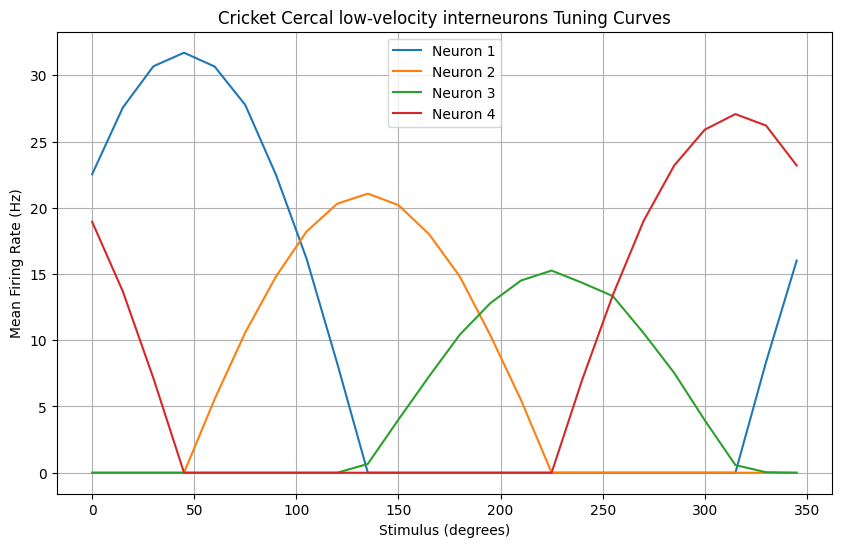

In [4]:
plot_tuning_curves() # function defined in spike_train_sim_functions.py

  The firing rates exhibited by the directionally-tuned neurons of the Cricket's cercal system can be approximated by the **half rectified cosine tuning curve**.
  - Negative firing rates are biologically implausible. The tuning curves with the negative rates being rectified to zero capture the firing pattern observed experimentally. Mathematically, this can be represented as:
$$
\frac{r(\theta)}{r_{\text{max}}} = \max\Big(0, \, \cos(\theta - \theta_{\text{pref}})\Big)
$$
  - where:
    - $\theta$: &emsp; Stimulus direction.
    - $r_{\text{max}}$:&emsp;Maximum firing rate.
    - $\theta_{\text{pref}}$:&emsp;Neuron's preferred direction.
       - The max operator ensures firing rates remain non-negative.

  

The cosine evaluates to a maximum when the stimulus points in the same direction as the preferred direction. When the separation is a 180 $\degree$, there is no response, which is why the formula has no baseline rate. The original tuning curve function by Georgopoulos for M1 neurons has a baseline firing rate. 

Theunissen and Miller discovered only four types of interneurons encoded lower velocity wind stimulus, which explains the four types of tuning curves observed. These interneuron types have peak responses front, back, right, and left to the insect, thus spanning the entire 360 $\degree$ range of the stimulus.

### Wind Velocity Projection

The stimulus direction $\theta$ can be represented by a spatial vector $\vec{v}$ of unit length pointing parallel to wind velocity. &emsp; $\|\mathbf{v}\| [cos(\theta), sin(\theta)]$ where $\|\mathbf{v}\| = 1 $ </br>

Similarly, preferred direction for each interneuron can be represented by a unit vector $\vec{b}_i$ (with $i=1,2,3,4$ for the four interneurons),</br>
  $\vec{b}_i = cos(\theta_{\text{pref}})\hat{x} + sin(\theta_{\text{pref}})\hat{y}$ 
  - The cosine difference expression $\cos(\theta - \theta_{\text{pref}}) $ can be interpreted in terms of dot product $ \mathbf{v} \cdot \mathbf{b_i} =  \|\mathbf{v}\|\cos\theta $ , i.e , the projection of the wind velocity vector onto the preferred direction vector.
    - The dot product gives the projection's magnitude, the strength of air current along the preferred direction.. The authors showed that the interneurons response is proportional to this projection.
    
**This gives us the response of a single interneuron. The population vector is the summation of the responses of all the neurons in the system.** 

### Overcomplete Basis

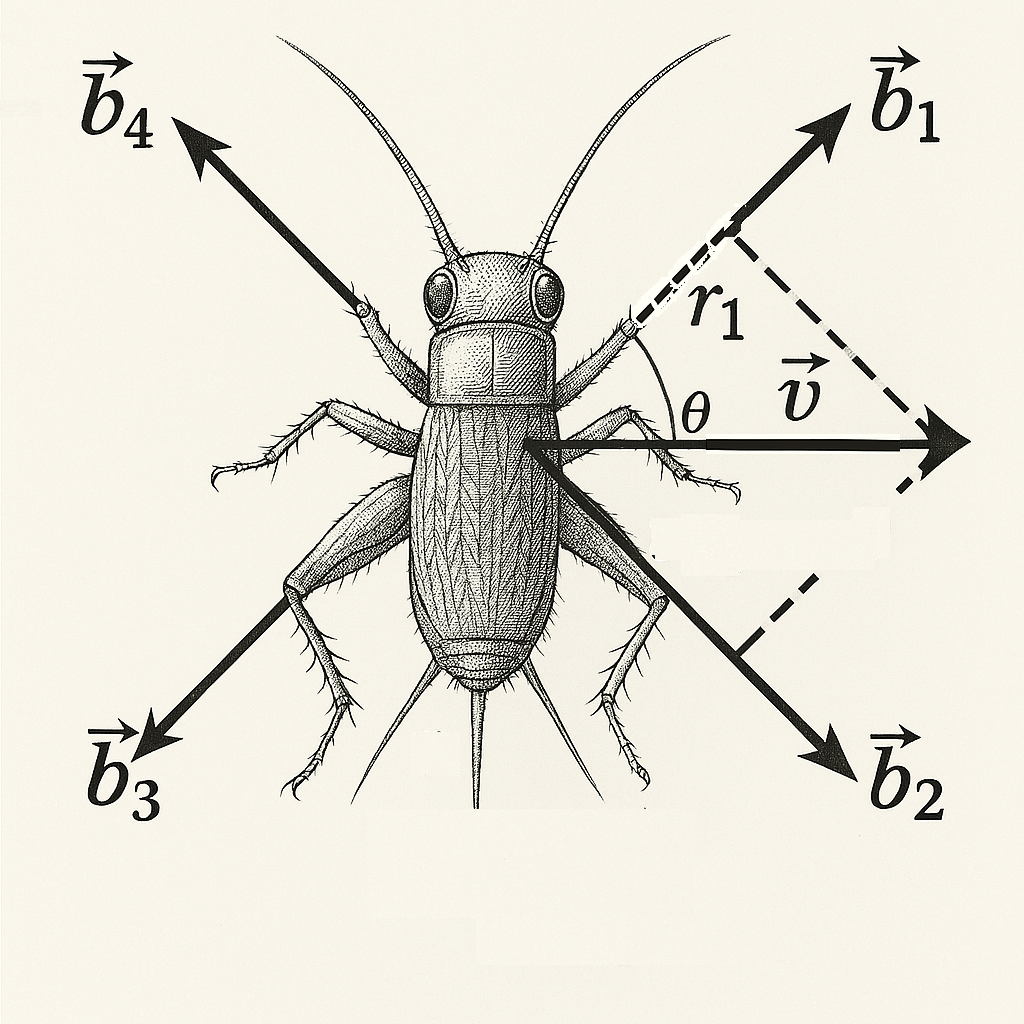

The preferred directions of the four interneurons are orthogonal to each other and lie along the two perpendicular directions, just as in the 2D Cartesian coordinate system. However, since the biological world doesn't have negative firing rates, four basis vectors are defined to encode the wind velocity in 2D.

In [5]:
with open('rates_basis_4.pickle', 'rb') as f:
    pop_data = pickle.load(f)
pop_data

{'c1': array([0.70710678, 0.70710678]),
 'r1': array([11.9, 12.8, 13.9, 12.1, 11.3, 12.2, 12.9, 12.4, 13.2, 10.7]),
 'r3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'c2': array([ 0.70710678, -0.70710678]),
 'c3': array([-0.70710678, -0.70710678]),
 'r2': array([18.8, 18. , 19. , 19.1, 18.1, 21.5, 20.3, 21.2, 18.6, 20.4]),
 'c4': array([-0.70710678,  0.70710678]),
 'r4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [6]:
def population_vector(neuron_rates, neuron_rate_max,basis_vector):
    """
    Computes the dot product of the normalized rates and the basis vector and returns the population vector.
    """
    x1=np.mean([np.dot (rate/neuron_rate_max, basis_vector[0]) for rate in neuron_rates])
    y1=np.mean([np.dot (rate/neuron_rate_max, basis_vector[1]) for rate in neuron_rates])
    return x1,y1

In [7]:
first_neuron_pop_vector = population_vector(pop_data['r1'], neuron1_highest_rate, pop_data['c1'])
first_neuron_pop_vector

(np.float64(0.2457943008406196), np.float64(0.2457943008406196))

In [8]:
second_neuron_pop_vector = population_vector(pop_data['r2'], neuron2_highest_rate, pop_data['c2'])
second_neuron_pop_vector

(np.float64(0.5697761253362675), np.float64(-0.5697761253362675))

In [9]:
third_neuron_pop_vector = population_vector(pop_data['r3'], neuron3_highest_rate, pop_data['c3'])
third_neuron_pop_vector

(np.float64(0.0), np.float64(0.0))

In [10]:
fourth_neuron_pop_vector = population_vector(pop_data['r4'], neuron4_highest_rate, pop_data['c4'])
fourth_neuron_pop_vector

(np.float64(0.0), np.float64(0.0))

In [11]:
overall_x = np.mean([first_neuron_pop_vector[0], second_neuron_pop_vector[0], third_neuron_pop_vector[0], fourth_neuron_pop_vector[0]])
overall_y = np.mean([first_neuron_pop_vector[1], second_neuron_pop_vector[1], third_neuron_pop_vector[1], fourth_neuron_pop_vector[1]])
overall_x, overall_y

(np.float64(0.20389260654422178), np.float64(-0.08099545612391199))

In [14]:
angle_radian = np.arctan2(overall_y, overall_x)
angle_radian

np.float64(-0.3781297062366954)

Azimuth angle: .....    $0^{\circ}$ to point in the direction of the positive y-axis and $90^{\circ}$ to point in the direction of the positive x-axis (i.e., 0 degrees is north, 90 degrees is east).

In [15]:
angle_degree_clockwise = (90 - np.degrees(angle_radian)) % 360  # measured clockwise from the positive y-axis
angle_degree_clockwise

np.float64(111.6652362758843)